In [2]:
from datetime import datetime
import time
import os
from tqdm import tqdm
import pandas as pd
import re
import matplotlib.pyplot as plt

In [3]:
bug_df = pd.read_csv('./Modify various indicators of posts that have been reused multiple times.txt')
bug_df.info()
bug_df.head(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     55 non-null     int64  
 1   CreationDate   55 non-null     object 
 2   Title          55 non-null     object 
 3   Tags           55 non-null     object 
 4   Score          55 non-null     int64  
 5   AnswerCount    55 non-null     int64  
 6   CommentCount   55 non-null     int64  
 7   FavoriteCount  14 non-null     float64
dtypes: float64(1), int64(4), object(3)
memory usage: 3.6+ KB


,Unnamed: 0,CreationDate,Title,Tags,Score,AnswerCount,CommentCount,FavoriteCount
0,0,2012-03-01T22:01:25.820,How to display a collection item in a JSP Page,java spring jsp jstl,0,1,2,NaN
1,1,2012-03-01T22:01:25.820,How to display a collection item in a JSP Page,java spring jsp jstl,0,1,2,NaN


In [4]:
non_bug_df = pd.read_csv('./all post/so details.txt')
non_bug_df.info()
non_bug_df.head(2)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1355616 entries, 0 to 1355615
Data columns (total 7 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   CreationDate   1355616 non-null  object 
 1   Title          1355614 non-null  object 
 2   Tags           1355616 non-null  object 
 3   Score          1355616 non-null  int64  
 4   AnswerCount    1355616 non-null  int64  
 5   CommentCount   1355616 non-null  int64  
 6   FavoriteCount  306473 non-null   float64
dtypes: float64(1), int64(3), object(3)
memory usage: 72.4+ MB


,CreationDate,Title,Tags,Score,AnswerCount,CommentCount,FavoriteCount
0,2008-08-01T16:10:30.337,How would you access Object properties from wi...,java php oop theory,97,18,0,6.0
1,2008-08-02T08:58:27.540,What is the meaning of the type safety warning...,java generics warnings casting type-safety,75,1,1,9.0


In [5]:
Score1, Score2 = bug_df['Score'].dropna().to_list(), non_bug_df['Score'].dropna().to_list()



Score = [Score1, Score2]


In [5]:
# df1['FavoriteCount'].dropna().to_list()

In [6]:
len(Score1),len(Score2)

(55, 1355616)

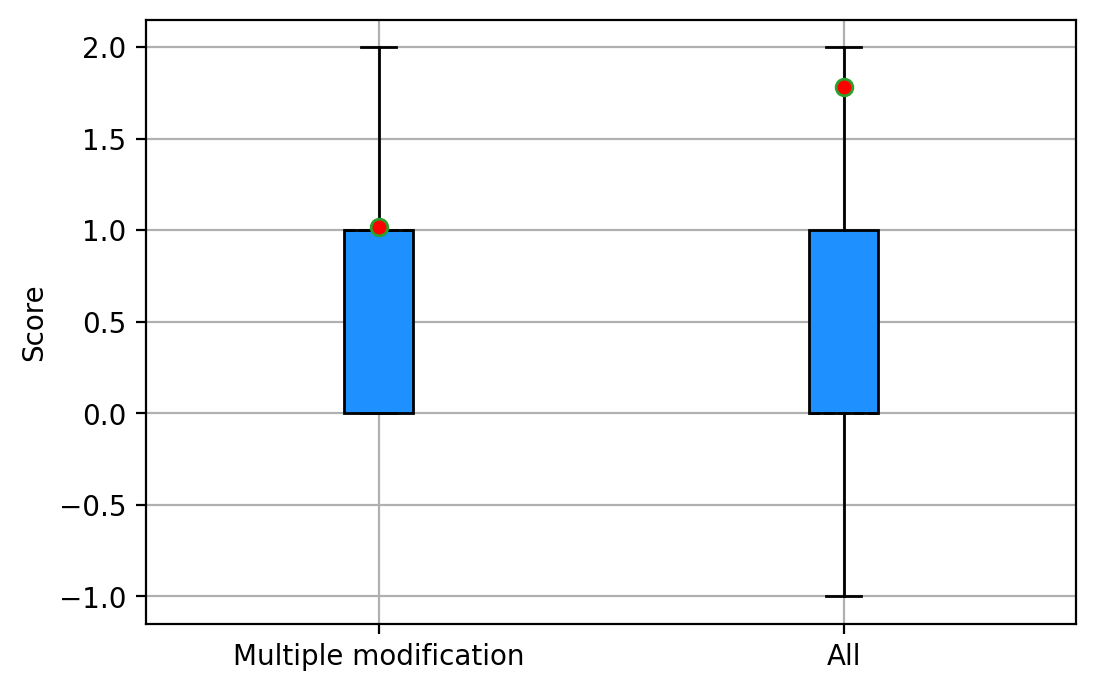

In [7]:
plt.figure(dpi=200)

plt.boxplot(Score,
            labels = ['Multiple modification', 'All'],
            patch_artist=True,
            showmeans=True,
            boxprops = {'color':'black','facecolor':'#1E90FF'},
            showfliers = False,
            meanprops = {'marker':'o','markerfacecolor':'red'},
            medianprops = {'linestyle':'--','color':'black'},)
plt.grid()
plt.ylabel('Score')
# plt.yticks(range(2008, 2021), range(2008, 2021))
# plt.xticks(rotation=45)
plt.savefig('./pic/Score.jpg')
plt.show()

In [8]:
AnswerCount1, AnswerCount2 = bug_df['AnswerCount'].dropna().to_list(), non_bug_df['AnswerCount'].dropna().to_list()

AnswerCount = [AnswerCount1, AnswerCount2]


In [9]:
len(AnswerCount1),len(AnswerCount2)


(55, 1355616)

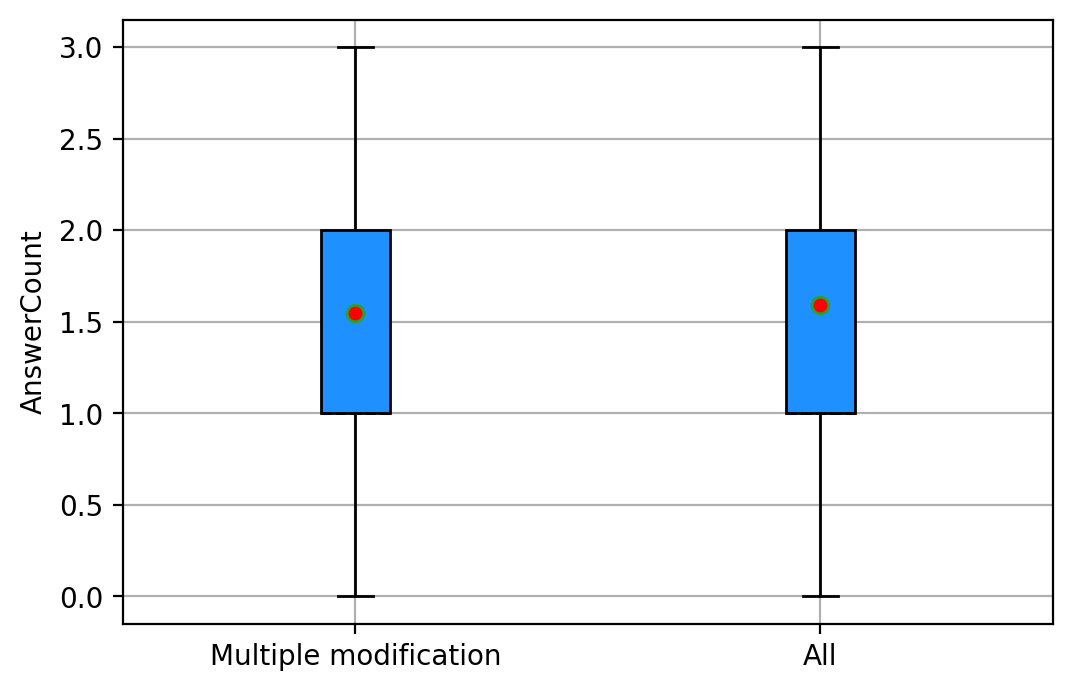

In [10]:
plt.figure(dpi=200)

plt.boxplot(AnswerCount,
            labels = ['Multiple modification', 'All'],
            patch_artist=True,
            showmeans=True,
            boxprops = {'color':'black','facecolor':'#1E90FF'},
            showfliers = False,
            meanprops = {'marker':'o','markerfacecolor':'red'},
            medianprops = {'linestyle':'--','color':'black'},)
plt.grid()
plt.ylabel('AnswerCount')
# plt.yticks(range(2008, 2021), range(2008, 2021))
# plt.xticks(rotation=45)
plt.savefig('./pic/AnswerCount.jpg')
plt.show()

In [11]:
CommentCount1, CommentCount2 = bug_df['CommentCount'].dropna().to_list(), non_bug_df['CommentCount'].dropna().to_list()

CommentCount = [CommentCount1, CommentCount2]
len(CommentCount1),len(CommentCount2)

(55, 1355616)

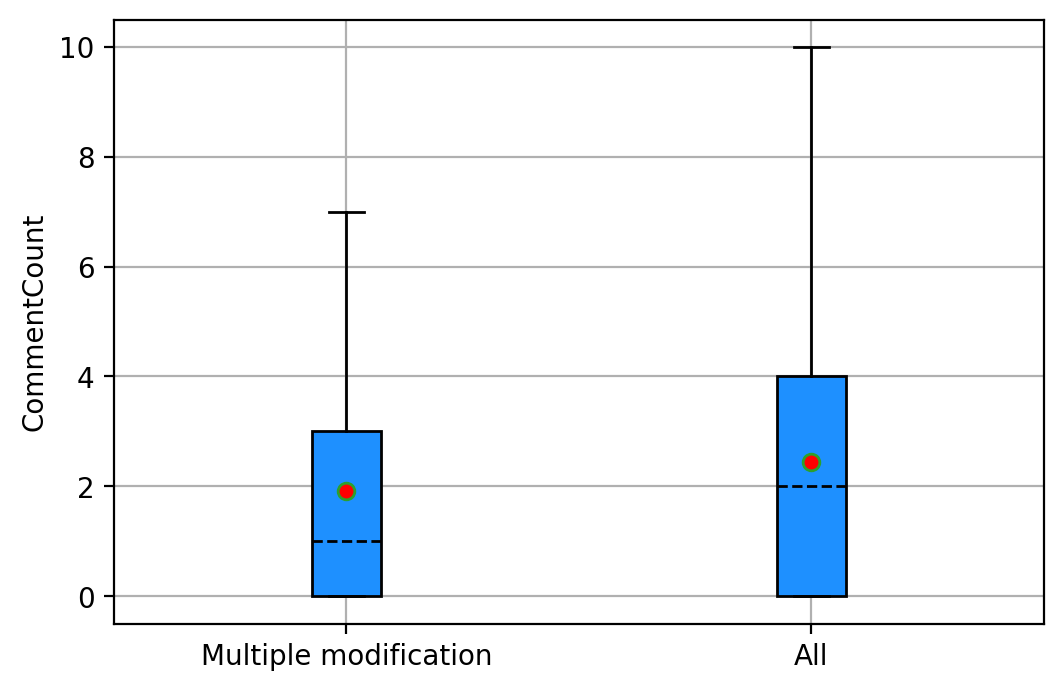

In [12]:
plt.figure(dpi=200)
plt.boxplot(CommentCount,
            labels = ['Multiple modification', 'All'],
            patch_artist=True,
            showmeans=True,
            boxprops = {'color':'black','facecolor':'#1E90FF'},
            showfliers = False,
            meanprops = {'marker':'o','markerfacecolor':'red'},
            medianprops = {'linestyle':'--','color':'black'},)
plt.grid()
plt.ylabel('CommentCount')
# plt.yticks(range(2008, 2021), range(2008, 2021))
# plt.xticks(rotation=45)
plt.savefig('./pic/CommentCount.jpg')
plt.show()

In [13]:
FavoriteCount1, FavoriteCount2 = bug_df['FavoriteCount'].dropna().to_list(), non_bug_df['FavoriteCount'].dropna().to_list()

FavoriteCount = [FavoriteCount1, FavoriteCount2]
len(FavoriteCount1),len(FavoriteCount2)


(14, 306473)

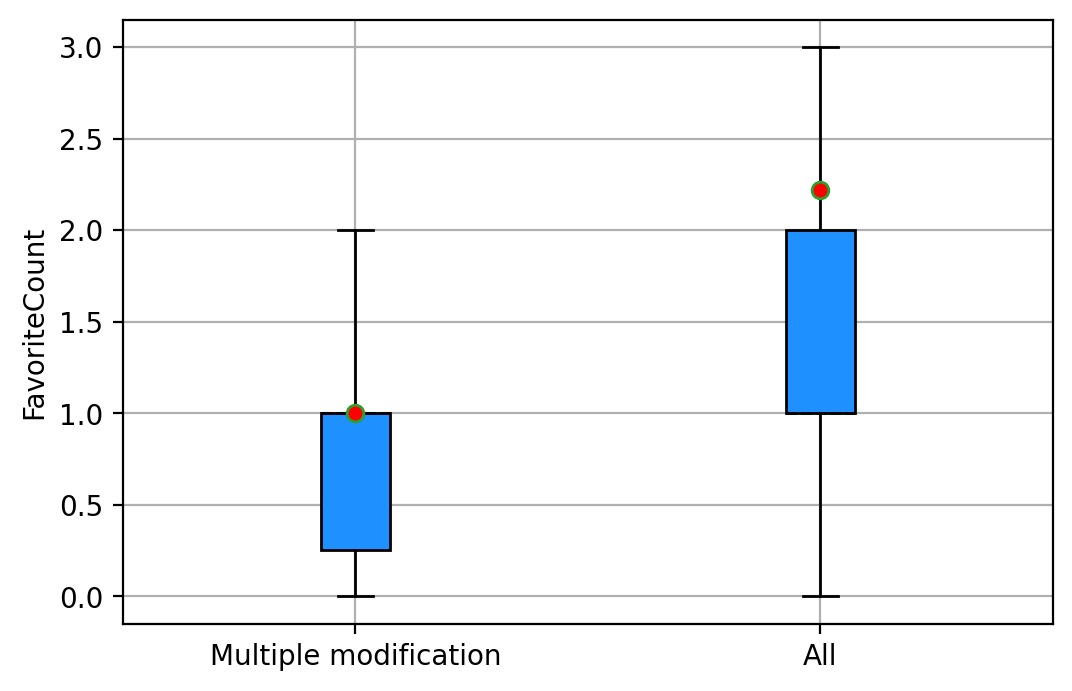

In [14]:
plt.figure(dpi=200)

plt.boxplot(FavoriteCount,
            labels = ['Multiple modification', 'All'],
            patch_artist=True,
            showmeans=True,
            boxprops = {'color':'black','facecolor':'#1E90FF'},
            showfliers = False,
            meanprops = {'marker':'o','markerfacecolor':'red'},
            medianprops = {'linestyle':'--','color':'black'},flierprops={'marker':'o'})
plt.grid()
plt.ylabel('FavoriteCount')

plt.savefig('./pic/FavoriteCount.jpg')
plt.show()


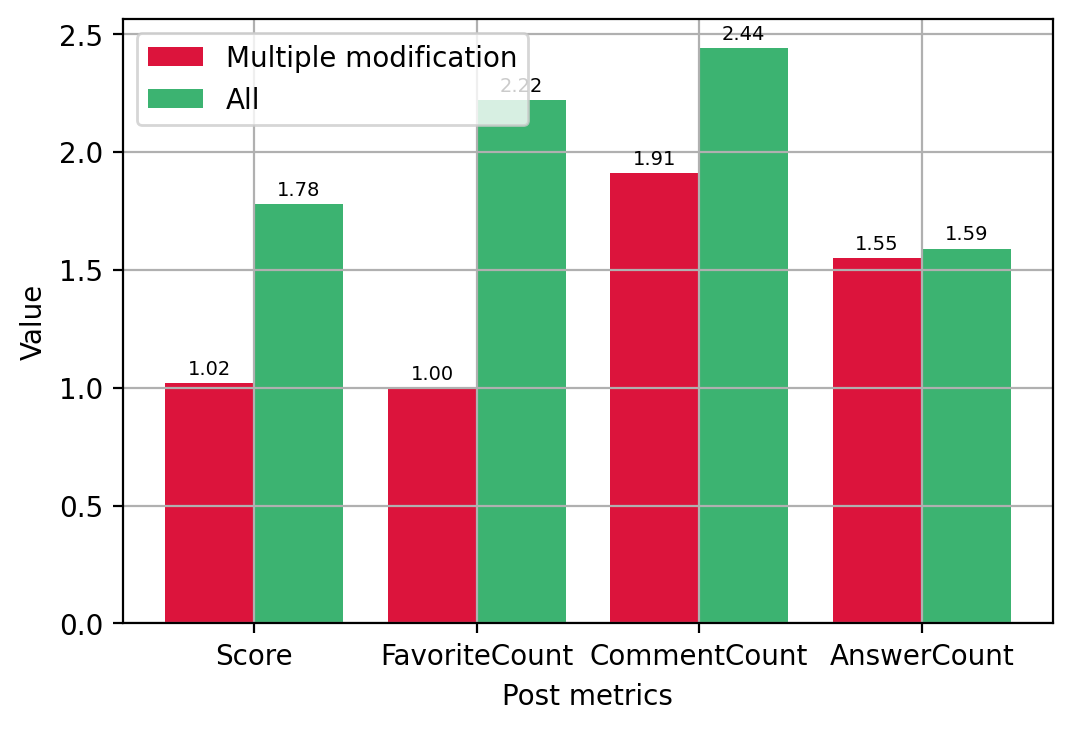

In [40]:
import matplotlib.pyplot as plt
import numpy as np
x = np.arange(4)
men_means = [round(np.mean(Score1),2), round(np.mean(FavoriteCount1),2), round(np.mean(CommentCount1),2), round(np.mean(AnswerCount1),2)]
women_means = [round(np.mean(Score2),2), round(np.mean(FavoriteCount2),2), round(np.mean(CommentCount2),2), round(np.mean(AnswerCount2),2)]
listDate = ['Score', 'FavoriteCount', 'CommentCount', 'AnswerCount']

plt.figure(dpi=200)
total_width, n = 0.8, 2
width = total_width / n
x1 = x - width / 2
x2 = x1 + width


plt.xlabel("Post metrics")
plt.ylabel("Value")
plt.bar(x1, men_means, width=width, label="Multiple modification",color='#DC143C')
plt.bar(x2, women_means, width=width, label="All", color='#3CB371')
plt.xticks(x, listDate)

for a, b in zip(x1, men_means):
	plt.text(a, b + 0.02, '%.2f' % b, ha='center', va='bottom', fontsize=7)

for a, b in zip(x2, women_means):
	plt.text(a, b + 0.02, '%.2f' % b, ha='center', va='bottom', fontsize=7)


plt.legend(loc='upper left',)
plt.grid()
plt.savefig('./pic/post att.jpg', bbox_inches = 'tight')
